# Token Projection Analysis

A minimal implementation to analyze how much of the residual stream projects onto the token prediction subspace.

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from minimal_token_projection import analyze_token_projection

/Users/kyle/Documents/ws/latent-space-reasoning-interp/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Run Basic Analysis

We'll use simple prompts and the DistilGPT2 model for a basic test.

Loading model: gpt2-small
Loaded pretrained model gpt2-small into HookedTransformer
Model loaded with 768 dimensions
Getting unembedding matrix...
Unembedding matrix shape: (768, 50257)
Computing SVD (this might take a moment)...
SVD complete. U shape: (768, 768), S shape: (768,)
Dimensions needed for 90.0% variance: 569
Token directions shape: (768, 569)
Projection matrix shape: (768, 768)

Analyzing factual prompt: 'The capital of France is Paris.'
Processing blocks.0.hook_resid_pre: activation shape (1, 8, 768)
Processing blocks.1.hook_resid_post: activation shape (1, 8, 768)
Processing blocks.2.hook_resid_post: activation shape (1, 8, 768)
Processing blocks.3.hook_resid_post: activation shape (1, 8, 768)
Processing blocks.4.hook_resid_post: activation shape (1, 8, 768)
Processing blocks.5.hook_resid_post: activation shape (1, 8, 768)
Processing blocks.6.hook_resid_post: activation shape (1, 8, 768)
Processing blocks.7.hook_resid_post: activation shape (1, 8, 768)
Processing blocks.

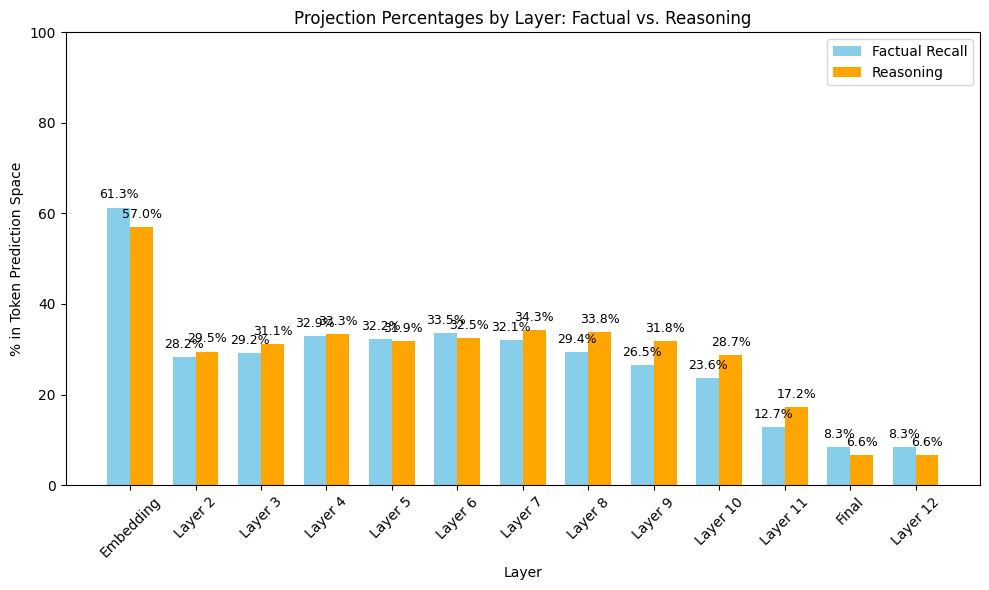

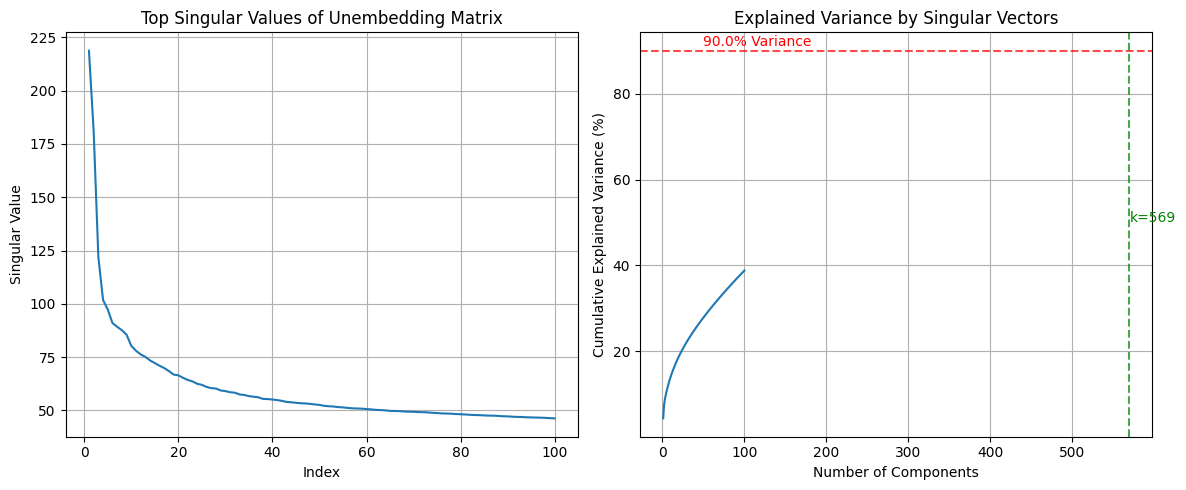

In [4]:
# Run with default parameters
results = analyze_token_projection(
    factual_prompt="The capital of France is Paris.",
    reasoning_prompt="If x + 5 = 10, then x equals 5.",
    model_name="gpt2-small",  # Smaller model for MacBook
    variance_threshold=.9
)

## Try More Complex Examples

Now let's try longer, more complex examples to see a stronger difference.

Loading model: gpt2-small
Loaded pretrained model gpt2-small into HookedTransformer
Model loaded with 768 dimensions
Getting unembedding matrix...
Unembedding matrix shape: (768, 50257)
Computing SVD (this might take a moment)...
SVD complete. U shape: (768, 768), S shape: (768,)
Dimensions needed for 90.0% variance: 569
Token directions shape: (768, 569)
Projection matrix shape: (768, 768)

Analyzing factual prompt: 'The elements in the first column of the periodic table are: hydrogen, lithium, sodium, potassium, rubidium, cesium, and francium.'
Processing blocks.0.hook_resid_pre: activation shape (1, 33, 768)
Processing blocks.1.hook_resid_post: activation shape (1, 33, 768)
Processing blocks.2.hook_resid_post: activation shape (1, 33, 768)
Processing blocks.3.hook_resid_post: activation shape (1, 33, 768)
Processing blocks.4.hook_resid_post: activation shape (1, 33, 768)
Processing blocks.5.hook_resid_post: activation shape (1, 33, 768)
Processing blocks.6.hook_resid_post: activatio

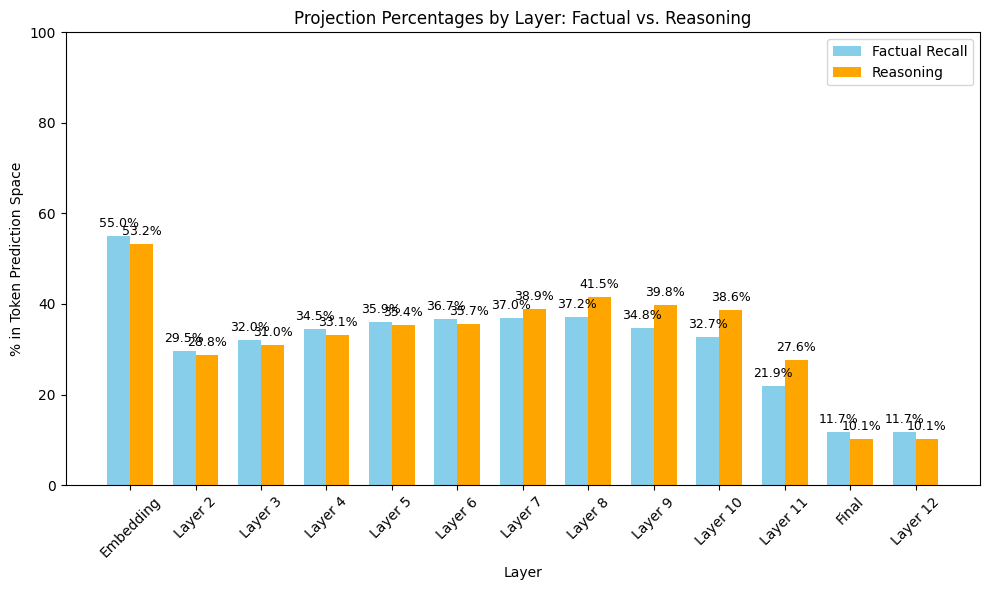

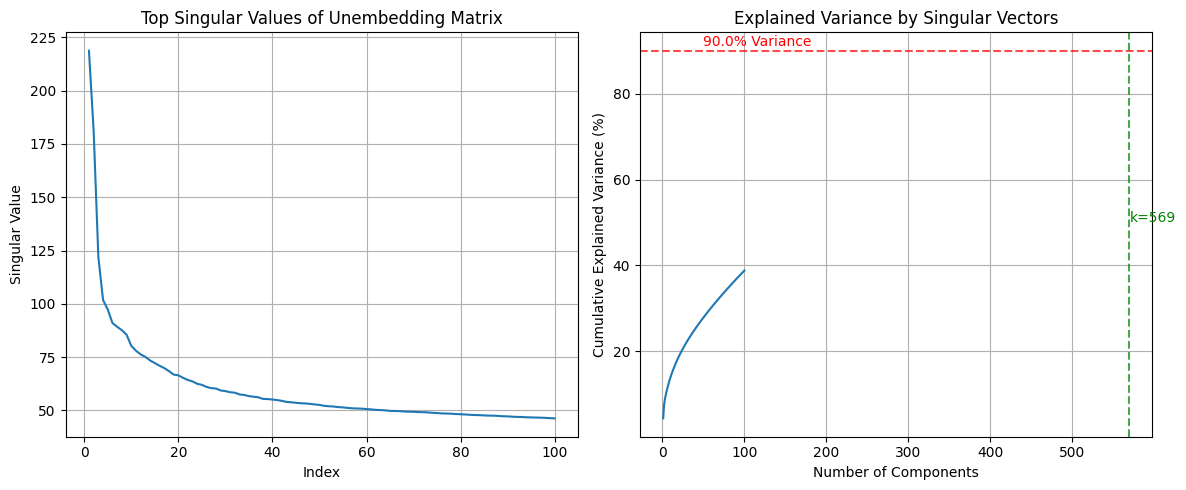

In [5]:
# Run with more complex prompts
complex_results = analyze_token_projection(
    factual_prompt="The elements in the first column of the periodic table are: hydrogen, lithium, sodium, potassium, rubidium, cesium, and francium.",
    reasoning_prompt="To find the derivative of f(x) = x^2 * sin(x), we use the product rule. First, we take the derivative of x^2 which is 2x, and multiply by sin(x). Then we take the derivative of sin(x) which is cos(x), and multiply by x^2.",
    model_name="gpt2-small",
    variance_threshold=0.9  # Lower threshold to reduce computation
)

## Try Different Variance Thresholds

Let's see how changing the variance threshold affects the results.

Loading model: distilgpt2
Loaded pretrained model distilgpt2 into HookedTransformer
Model loaded with 768 dimensions
Getting unembedding matrix...
Unembedding matrix shape: (768, 50257)
Computing SVD (this might take a moment)...
SVD complete. U shape: (768, 768), S shape: (768,)
Dimensions needed for 80.0% variance: 404
Token directions shape: (768, 404)
Projection matrix shape: (768, 768)

Analyzing factual prompt: 'The capital of Japan is Tokyo.'
Processing blocks.0.hook_resid_pre: activation shape (1, 8, 768)
Processing blocks.1.hook_resid_post: activation shape (1, 8, 768)
Processing blocks.2.hook_resid_post: activation shape (1, 8, 768)
Processing blocks.3.hook_resid_post: activation shape (1, 8, 768)
Processing blocks.4.hook_resid_post: activation shape (1, 8, 768)
Processing blocks.5.hook_resid_post: activation shape (1, 8, 768)
Processing ln_final.hook_normalized: activation shape (1, 8, 768)

Analyzing reasoning prompt: 'If 2x + 3 = 7, then x equals 2.'
Processing blocks.0.ho

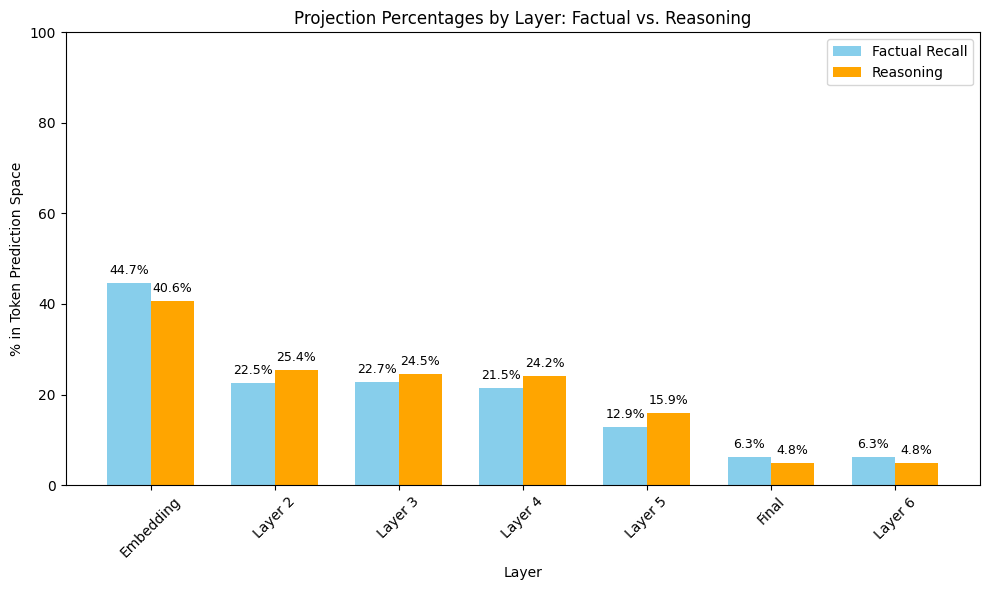

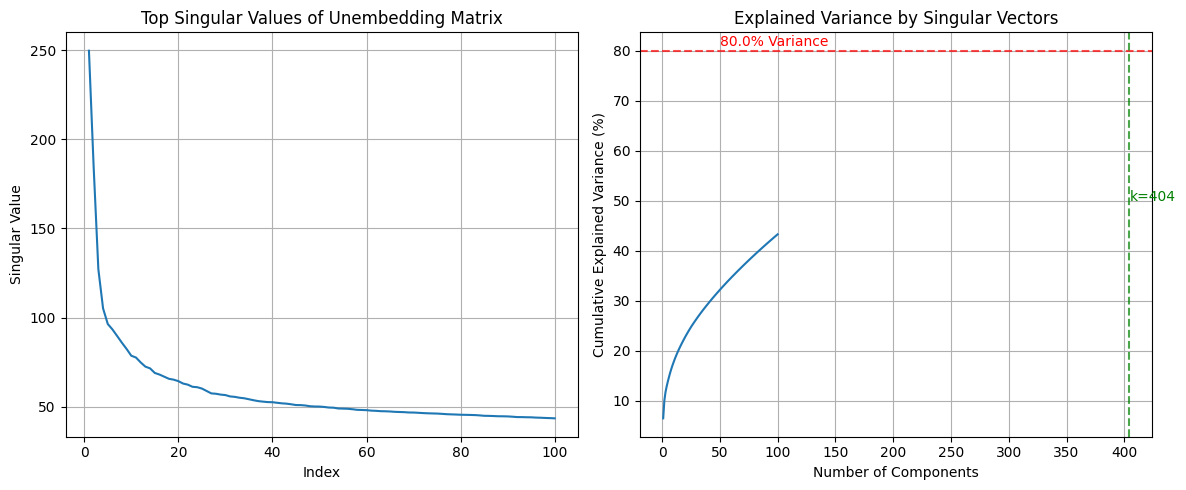

In [6]:
# Try with a lower variance threshold
lower_threshold_results = analyze_token_projection(
    factual_prompt="The capital of Japan is Tokyo.",
    reasoning_prompt="If 2x + 3 = 7, then x equals 2.",
    model_name="distilgpt2",
    variance_threshold=0.8  # Lower threshold = fewer dimensions
)

## Interpretation

Based on these results, we can interpret what the analysis tells us about the dual role of the residual stream:

1. **Concentration of Token Prediction**: If a small subset of dimensions can explain most of the variance in token prediction, this suggests the token prediction function is concentrated in a small subspace.

2. **Task Differences**: If factual recall tasks project more onto this subspace than reasoning tasks, it supports the hypothesis that reasoning requires more "persistent memory" that isn't directly expressed as output.

3. **Layer Progression**: If earlier layers project less onto the token space than later layers, this suggests a progression from "thinking" to "outputting" as information moves through the network.

This provides evidence for the dual role of the residual stream in both immediate token prediction and maintaining a persistent reasoning state.